### Load libraries 




In [1]:
import pandas as pd
from IPython import display

import os 
import sys

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.1.3'

In [3]:
#!pwd
print(os.getcwd())

C:\Users\rohan\Documents\UNI\Year 4\GDP\Git\gdp-wild-dogs


### Checking OS system 
- slight difference in file path for different OS systems:
    - linux: '/home/user/Data'
    - windows: 'C:\\user\\Data'

In [4]:
os_system = sys.platform
if os_system.startswith('win'):
    os_system = 'windows'
print('OS System: ', os_system)

OS System:  windows


### List Directory Tree

In [5]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [6]:
list_files(os.path.join(os.getcwd(), 'Data'))

Data/
    2020-11-05/
        201105_807d3a2a0fe8_xyz.pkl
        cut.pkl
        cutoff.txt
        labels.csv
        raw.pkl
    2020-11-16/
        201116_807d3a2a0fe8_xyz.pkl
        cut.pkl
        cutoff.txt
        labels.csv
        raw.pkl
    2020-11-23/
        201123_807d3a2a0fe8_xyz.pkl
        cut.pkl
        cutoff.txt
        labels.csv
        raw.pkl
    2020-11-26/
        201126_807d3a2a0fe8_xyz.pkl
        raw.pkl
    2020-11-27/
        201127_807d3a2a0fe8_xyz.pkl
        labels.csv
        raw.pkl
    2020-11-28/
        201128_807d3a2a0fe8_xyz.pkl
        raw.pkl


 ### Loading pkl files into DFs

In [7]:
dfList=[]
csvDFList=[]

# Directories are according to git's file structure 
# [Linux] ./gdp-wild-dogs/Data/
if os_system == 'linux':
    filepath = './Data'
    pathstyle = '/'
elif os_system == 'windows':
    filepath = 'Data'
    pathstyle = '\\'

#Store pkl from each day in df in list
for subdir, dirs, files in os.walk(filepath):
    for filename in os.listdir(subdir):
        if filename == "cut.pkl":
            df = pd.read_pickle(subdir+pathstyle+ filename)
            df.reset_index(inplace=True)
            dfList.append(df)
        if filename == "labels.csv":
            df = pd.read_csv(subdir+pathstyle+filename)
            df.reset_index(inplace=True)
            csvDFList.append(df)
print("Number of data files:")
print(len(dfList))

Number of data files:
3


In [8]:
for df in dfList:
    if(len(df["dt"]) > 0):
        print(str(df["dt"][0])[0:10])
        display.display(df.describe())

2020-11-05


,index,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter
count,5.160300e+04,51603.000000,51603.000000,51603.000000,51603.000000,51603.000000,5.160300e+04,5.160300e+04,51603.000000
mean,1.776850e+06,-593.534077,-282.372672,-607.041606,-1613.547274,-4044.129508,-5.850420e+03,5.655464e+05,24.494913
std,1.489665e+04,924.074716,738.856394,893.257968,133615.227727,106539.700871,1.288504e+05,5.078591e+05,14.426775
min,1.751049e+06,-7994.000000,-7860.000000,-7989.000000,-982590.000000,-714070.000000,-9.460500e+05,5.993000e+03,0.000000
25%,1.763950e+06,-883.000000,-656.000000,-901.000000,-62930.000000,-56280.000000,-5.950000e+04,2.839230e+05,12.000000
50%,1.776850e+06,-499.000000,-339.000000,-525.000000,-70.000000,-3640.000000,-3.360000e+03,5.419330e+05,24.000000
75%,1.789750e+06,-117.000000,67.000000,-132.000000,58170.000000,44380.000000,4.704000e+04,7.999430e+05,37.000000
max,1.802651e+06,4713.000000,7825.000000,4820.000000,912170.000000,814030.000000,1.127840e+06,7.196453e+06,49.000000


2020-11-16


,index,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter
count,134699.000000,134699.000000,134699.000000,134699.000000,1.346990e+05,1.346990e+05,134699.000000,1.346990e+05,134699.000000
mean,211600.000000,642.965122,0.948908,-666.393091,5.265697e+02,2.265346e+02,1981.559588,4.237993e+06,24.498274
std,38884.396292,552.142585,534.946670,507.614990,1.046683e+05,7.050509e+04,93278.141436,7.776879e+05,14.425461
min,144251.000000,-6648.000000,-6295.000000,-7421.000000,-1.238860e+06,-1.342670e+06,-858620.000000,2.891013e+06,0.000000
25%,177925.500000,455.000000,-341.000000,-792.000000,-3.780000e+04,-2.408000e+04,-33180.000000,3.564503e+06,12.000000
50%,211600.000000,608.000000,-45.000000,-641.000000,3.500000e+02,-2.800000e+02,1540.000000,4.237993e+06,24.000000
75%,245274.500000,772.000000,303.000000,-512.000000,3.766000e+04,2.254000e+04,35980.000000,4.911483e+06,37.000000
max,278949.000000,7546.000000,6607.000000,5288.000000,1.342320e+06,1.083390e+06,974050.000000,5.584973e+06,49.000000


2020-11-23


,index,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter
count,96299.000000,96299.000000,96299.000000,96299.000000,96299.000000,96299.000000,96299.000000,9.629900e+04,96299.000000
mean,188259.000000,685.967123,184.909885,-585.422839,-2062.369339,-342.111652,1764.676518,4.134299e+07,24.495041
std,27799.271124,394.235820,441.988140,306.318561,66914.127434,57204.250937,62732.408114,5.559854e+05,14.422804
min,140110.000000,-2221.000000,-2775.000000,-5617.000000,-475650.000000,-425810.000000,-480060.000000,4.038001e+07,0.000000
25%,164184.500000,483.000000,-70.000000,-747.000000,-37590.000000,-29890.000000,-32410.000000,4.086150e+07,12.000000
50%,188259.000000,658.000000,227.000000,-572.000000,-2660.000000,-630.000000,280.000000,4.134299e+07,24.000000
75%,212333.500000,859.000000,481.000000,-422.000000,33320.000000,27580.000000,34790.000000,4.182448e+07,37.000000
max,236408.000000,5081.000000,3849.000000,1198.000000,599200.000000,616980.000000,586670.000000,4.230597e+07,49.000000


In [9]:
#Remove all over redundant data for testing
# REMOVE ON FURTHER DEVELOPMENT!
dfList = dfList[0:3]

In [10]:
for df in csvDFList:
    df.describe()
    print(str(df["start_time"][0])[0:10] + " Labels Loaded")
    print(df.head())
    print()

for df in dfList:
    if(len(df["dt"]) > 0):
        print(str(df["dt"][0])[0:10] + " Clipped Device Data Loaded")
        print(df.head())
        print()

2020-11-05 Labels Loaded
   index                  start_time                    end_time   activity
0      0  2020-11-05 14:10:31.999742  2020-11-05 14:10:32.880472    jumping
1      1  2020-11-05 14:10:33.001560  2020-11-05 14:10:34.082089    jumping
2      2  2020-11-05 14:11:06.622403  2020-11-05 14:11:12.468232  galloping
3      3  2020-11-05 14:11:23.355164  2020-11-05 14:11:25.097815    sitting
4      4  2020-11-05 14:11:25.771735  2020-11-05 14:11:26.317840    jumping

2020-11-16 Labels Loaded
   index                  start_time                    end_time  activity
0      0  2020-11-16 10:58:40.662769  2020-11-16 10:58:59.467566  sniffing
1      1  2020-11-16 10:58:59.870234  2020-11-16 11:00:36.154043   walking
2      2  2020-11-16 11:00:36.344424  2020-11-16 11:00:56.899489   playing
3      3  2020-11-16 11:00:59.721018  2020-11-16 11:01:05.510005   walking
4      4  2020-11-16 11:01:10.834737  2020-11-16 11:01:20.306164   walking

2020-11-23 Labels Loaded
   index         

In [11]:
def label_data(dfList, csvDFList):
    labelledDFList = []
    for dfIndex in range(0, len(dfList)):
        labels = []
        df = dfList[dfIndex]
        if('activity' in df.columns):
            df.drop('activity', 1, inplace=True)
        labelledDFList.append(df)
        csv = csvDFList[dfIndex]
        intervalIndex = 0
        intervalBegin = pd.to_datetime(csv['start_time'][intervalIndex], utc=True)
        intervalEnd = pd.to_datetime(csv['end_time'][intervalIndex], utc=True)
        for i in range(0, len(df)):
            time = pd.to_datetime(df['dt'][i])
            while(time > intervalEnd):
                if(intervalIndex + 1 >= len(csv)):
                    break
                intervalIndex += 1
                intervalBegin = pd.to_datetime(csv['start_time'][intervalIndex], utc=True)
                intervalEnd = pd.to_datetime(csv['end_time'][intervalIndex], utc=True)
            if(time > intervalEnd or time < intervalBegin):
                labels.append("None")
            else:
                labels.append(csv["activity"][intervalIndex])
        labelledDFList[dfIndex]["activity"] = labels
    return labelledDFList

labelledDFList = label_data(dfList, csvDFList)

In [12]:
for i in range(0,len(labelledDFList)):
    labelledDFList[i].drop(labelledDFList[i].index[labelledDFList[i]['activity'] == 'None'], inplace = True)
    
merged_data = labelledDFList[1] #pd.concat(labelledDFList)
#merged_data = pd.concat(labelledDFList)
display.display(merged_data)

print(merged_data["activity"].nunique())

,index,dt,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter,activity
31583,175834,2020-11-16 10:58:40.680000+00:00,1479,53,-1059,-190750,-78820,-14770,3522673,32,sniffing
31584,175835,2020-11-16 10:58:40.700000+00:00,1464,-153,-820,-157290,-89040,-52430,3522693,33,sniffing
31585,175836,2020-11-16 10:58:40.720000+00:00,1312,-266,-650,-69370,-99680,-102270,3522713,34,sniffing
31586,175837,2020-11-16 10:58:40.740000+00:00,1060,-268,-446,26880,-114170,-139720,3522733,35,sniffing
31587,175838,2020-11-16 10:58:40.760000+00:00,902,-364,-331,105280,-102690,-138670,3522753,36,sniffing
...,...,...,...,...,...,...,...,...,...,...,...
134694,278945,2020-11-16 11:33:02.900000+00:00,-533,-1066,472,-77280,-115430,-3010,5584893,0,galloping
134695,278946,2020-11-16 11:33:02.920000+00:00,-272,-928,137,16660,-180110,-63700,5584913,1,galloping
134696,278947,2020-11-16 11:33:02.940000+00:00,10,-1524,-266,18760,-117600,-24780,5584933,2,galloping
134697,278948,2020-11-16 11:33:02.960000+00:00,220,-966,-371,39550,-45080,19880,5584953,3,galloping


9


In [13]:
X = merged_data[["acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z"]]

display.display(X)

y = merged_data[["activity"]]

display.display(y)

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
31583,1479,53,-1059,-190750,-78820,-14770
31584,1464,-153,-820,-157290,-89040,-52430
31585,1312,-266,-650,-69370,-99680,-102270
31586,1060,-268,-446,26880,-114170,-139720
31587,902,-364,-331,105280,-102690,-138670
...,...,...,...,...,...,...
134694,-533,-1066,472,-77280,-115430,-3010
134695,-272,-928,137,16660,-180110,-63700
134696,10,-1524,-266,18760,-117600,-24780
134697,220,-966,-371,39550,-45080,19880


,activity
31583,sniffing
31584,sniffing
31585,sniffing
31586,sniffing
31587,sniffing
...,...
134694,galloping
134695,galloping
134696,galloping
134697,galloping


In [14]:
from sklearn import cluster
import numpy as np

params = {'quantile': .3,
                'eps': 0.4,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 12,
                'xi': 0.05,
                'min_cluster_size': 0.1}

# estimate bandwidth for mean shift
#bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bin_seeding=True, cluster_all = False)

dbscan = cluster.DBSCAN(eps=params['eps'],min_samples=params['min_samples'])

optics = cluster.OPTICS(min_samples=params['min_samples'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])


clustering_algorithms = (

    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('DBSCAN', dbscan),
    ('OPTICS', optics),
)

In [15]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

mean_shift = ms.fit(X)
mean_shift_labels = mean_shift.labels_
mean_shift_n_clusters = len(mean_shift.cluster_centers_)
print(mean_shift_n_clusters)

In [16]:
DBSCAN = dbscan.fit(X)
DBSCAN_labels = DBSCAN.labels_
DBSCAN_n_clusters = np.unique(DBSCAN_labels).size
print(DBSCAN_n_clusters)

10


OPTICS = optics.fit(X)
OPTICS_labels = OPTICS.labels_
OPTICS_n_clusters = np.unique(OPTICS_labels).size
print(OPTICS_n_clusters)

In [17]:
df_compare = pd.DataFrame({"cluster_label" :DBSCAN_labels})

df_compare = pd.concat([df_compare.reset_index(drop=True), merged_data[["activity"]].reset_index(drop=True)], axis=1)

display.display(df_compare)

,cluster_label,activity
0,-1,sniffing
1,-1,sniffing
2,-1,sniffing
3,-1,sniffing
4,-1,sniffing
...,...,...
78769,-1,galloping
78770,-1,galloping
78771,-1,galloping
78772,-1,galloping


,cluster_label,activity
0,-1,sniffing
1,-1,sniffing
2,-1,sniffing
3,-1,sniffing
4,-1,sniffing
...,...,...
78769,-1,galloping
78770,-1,galloping
78771,-1,galloping
78772,-1,galloping


{'walking': 12738,
 'trotting': 7491,
 'galloping': 5256,
 'playing': 2734,
 'sniffing': 1908,
 'standing': 431,
 'eating': 104,
 'laying': 77,
 'sitting': 61}

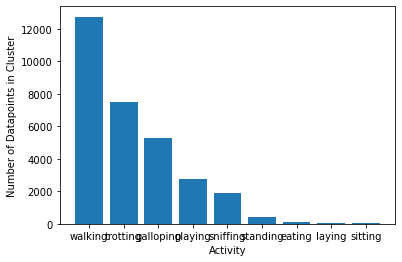

,cluster_label,activity
13,0,sniffing
15,0,sniffing
16,0,sniffing
18,0,sniffing
19,0,sniffing
...,...,...
78617,0,walking
78618,0,walking
78619,0,walking
78620,0,walking


{'walking': 22597,
 'standing': 12878,
 'sniffing': 6443,
 'laying': 3477,
 'eating': 679,
 'playing': 648,
 'trotting': 538,
 'sitting': 194,
 'galloping': 78}

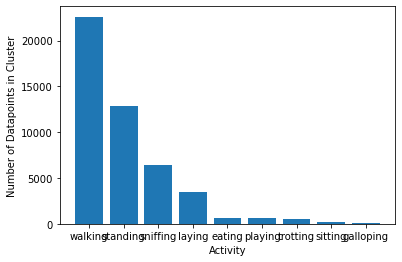

,cluster_label,activity
9053,1,trotting
9436,1,trotting
15976,1,trotting
36540,1,sitting
36541,1,sitting
...,...,...
36905,1,sitting
36906,1,sitting
36907,1,sitting
36916,1,sitting


{'sitting': 357, 'trotting': 4}

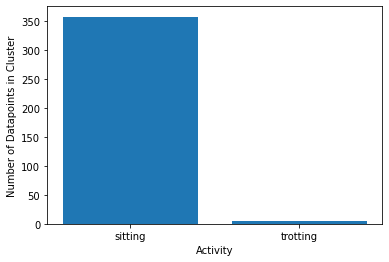

,cluster_label,activity
1750,2,walking
6309,2,playing
16268,2,standing
16269,2,standing
16270,2,standing
16271,2,standing
16272,2,standing
16273,2,standing
16274,2,standing
16275,2,standing


{'standing': 10, 'walking': 4, 'playing': 1}

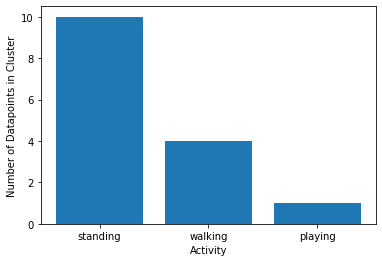

,cluster_label,activity
732,3,sniffing
733,3,sniffing
2307,3,walking
24071,3,walking
35488,3,trotting
35820,3,walking
46526,3,walking
46987,3,walking
46988,3,walking
73686,3,walking


{'walking': 7, 'sniffing': 2, 'trotting': 1}

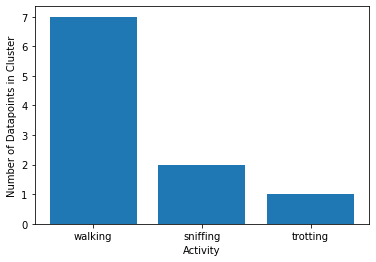

,cluster_label,activity
8637,4,galloping
13877,4,walking
13901,4,walking
13902,4,walking
14002,4,walking
14082,4,walking
42291,4,playing
59411,4,trotting
59432,4,trotting
61955,4,trotting


{'walking': 6, 'trotting': 3, 'playing': 1, 'galloping': 1}

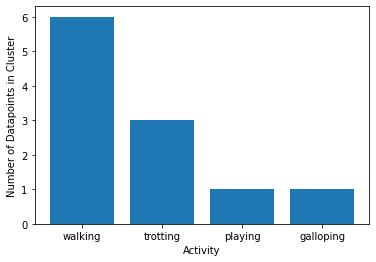

,cluster_label,activity
12430,5,trotting
17061,5,trotting
17062,5,trotting
21879,5,trotting
43020,5,playing
43363,5,playing
53850,5,trotting
53851,5,trotting
56459,5,trotting
61996,5,trotting


{'trotting': 11, 'playing': 2}

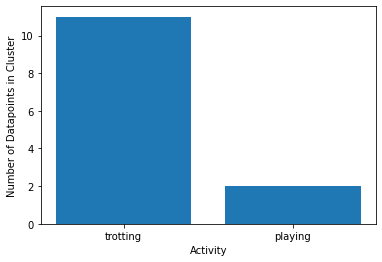

,cluster_label,activity
6155,6,playing
6498,6,playing
17014,6,trotting
20816,6,trotting
53782,6,trotting
56740,6,trotting
69034,6,trotting
76724,6,trotting
76747,6,trotting


{'trotting': 7, 'playing': 2}

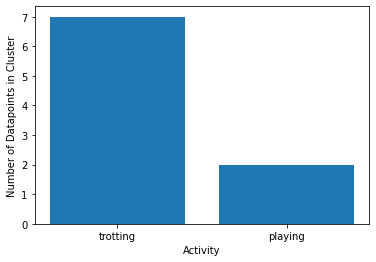

,cluster_label,activity
9743,7,sniffing
9744,7,sniffing
23543,7,walking
35569,7,walking
44313,7,walking
57742,7,walking
58387,7,walking
58388,7,walking
58433,7,walking
58434,7,walking


{'walking': 12, 'sniffing': 2}

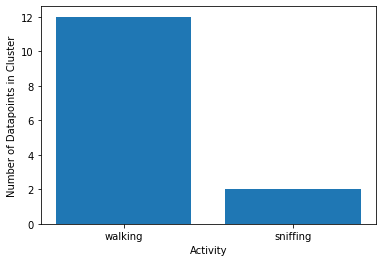

,cluster_label,activity
20794,8,trotting
62520,8,walking
62521,8,walking
63768,8,walking
63769,8,walking
69427,8,trotting
73855,8,walking
76865,8,trotting
77178,8,trotting


{'walking': 5, 'trotting': 4}

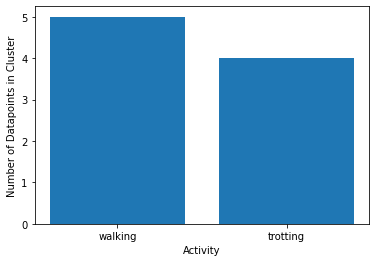

In [18]:
unique_label = list(set(DBSCAN_labels))

for i in range(len(unique_label)):
    
    temp = df_compare[df_compare.cluster_label == i-1]
    display.display(temp)
    display.display(temp.activity.value_counts().to_dict())
    plt.bar(temp.activity.value_counts().to_dict().keys(),temp.activity.value_counts().to_dict().values())
    plt.xlabel('Activity')
    plt.ylabel('Number of Datapoints in Cluster')
    plt.show()
    

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

new = pca.fit_transform(X)

In [20]:
print(new)

print(pca.explained_variance_ratio_)

[[ 0.59146782 -0.40288307 -1.65305111]
 [ 0.20768209 -0.47873825 -1.58880785]
 [-0.06138063 -0.37970369 -1.07354271]
 ...
 [-2.29697314  0.19175099 -1.73259982]
 [-1.31802242  0.27626988 -0.97614213]
 [-1.10106284  1.08657567  0.36131239]]
[0.29986112 0.18930945 0.17249302]


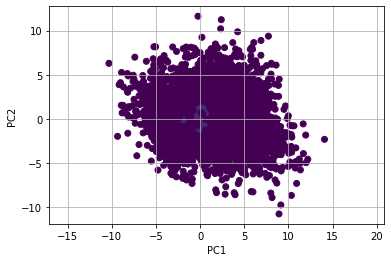

In [21]:
plt.xlabel("PC{}".format(1))

plt.ylabel("PC{}".format(2))

plt.grid() 

plt.axis('equal')

plt.scatter(new[:,0], new[:,1], c=DBSCAN.labels_.astype(float),)